In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import statsmodels.api as sm

sns.set_style("whitegrid") 

## `Deliverable 1`

In [ ]:
#Note: Have disintegrated the dataset into multiple csv files
df1 = pd.read_csv("/content/customer_data.csv")

In [ ]:
df1.head()

In [ ]:
indexNeg1 = df1[ df1['CustomerKey'] ==  -1 ].index
df1.drop(indexNeg1 , inplace=True)
df1.head(15)

In [ ]:
df2 = pd.read_csv("/content/product_data.csv")

In [ ]:
df2.head()

In [ ]:
df3 = pd.read_csv("/content/reseller_data.csv")

In [ ]:
indexNeg1 = df3[ df3['ResellerKey'] ==  -1 ].index
df3.drop(indexNeg1 , inplace=True)
df3.tail(15)

In [ ]:
df4 = pd.read_csv("sales_data.csv")

In [ ]:
df4.head()

In [ ]:
df4.shape

In [ ]:
df4["Total Cost"] = df4["Order Quantity"] * df4["Product Cost"]

In [ ]:
df4.head()

In [ ]:
df4["Net Sales"] = df4["Gross Sales "] - df4["Total Cost"]

In [ ]:
df4.head()

In [ ]:
df4.tail()

In [ ]:
df4.shape

In [ ]:
df4['yy'] = df4['OrderDateKey'].astype(str).str[:4]

In [ ]:
df4.shape

In [ ]:
df5 = pd.read_csv("sales_order_data.csv")

In [ ]:
df5.head()

In [ ]:
df6 = pd.read_csv("sales_territory_data.csv")

In [ ]:
df6.head()

In [ ]:
df4.columns.intersection(df1.columns)

In [ ]:
df4.columns.intersection(df2.columns)

In [ ]:
df4.columns.intersection(df3.columns)

In [ ]:
df4.columns.intersection(df5.columns)

In [ ]:
df4.columns.intersection(df6.columns)

In [ ]:
df4.shape

In [ ]:
df4.columns

In [ ]:
ndf1 = pd.merge(df1, df4, on="CustomerKey")
ndf1.head()

In [ ]:
ndf1.shape

In [ ]:
# this graph shows the gross sales with respect to the country-region; from the graph we can infer that the Australia has highest slaes, while Canada has the lowest sales.
plt.figure(figsize=(15,10))
sns.lineplot(y='Gross Sales ', x = 'Country-Region', data=ndf1, sizes=(.8, .8))

In [ ]:
ndf1.shape

In [ ]:
ndf2 = pd.merge(df2, ndf1, on="ProductKey")
ndf2.head()

In [ ]:
# this graph shows the quantity vs the product key and to get the distribution of the data
sns.boxenplot(y = 'ProductKey', x = 'Order Quantity', data = ndf1)

In [ ]:
df2.shape

In [ ]:
ndf2.shape

In [ ]:
ndf2.columns.intersection(df3.columns)

In [ ]:
ndf3 = pd.merge(df5, ndf2, on="SalesOrderLineKey")

In [ ]:
ndf3.head()

In [ ]:
ndf4 = pd.merge(df6, ndf3, on="SalesTerritoryKey")

In [ ]:
ndf4.head()

In [ ]:
ndf4.shape

In [ ]:
indexNeg = ndf4[ ndf4['ResellerKey'] ==  -1 ].index
indexNeg

In [ ]:
indexs = df4[ df4['ResellerKey'] ==  -1].index
indexs

In [ ]:
ndf_reseller_sales_data = pd.merge(df3, df4, on="ResellerKey")

In [ ]:
ndf_reseller_sales_data.shape

In [ ]:
ndf_reseller_sales_data.head()

## `Exploratory Data Analysis`

In [ ]:
# getting the unique categorical variable
categorical = ndf4.select_dtypes(['category', 'object']).columns 
for col in categorical:
    print('{} : {} unique value(s)'.format(col, ndf4[col].nunique()))

In [ ]:
# get the number of missing data points per column
missing_values_count = ndf4.isnull().sum()

missing_values_count

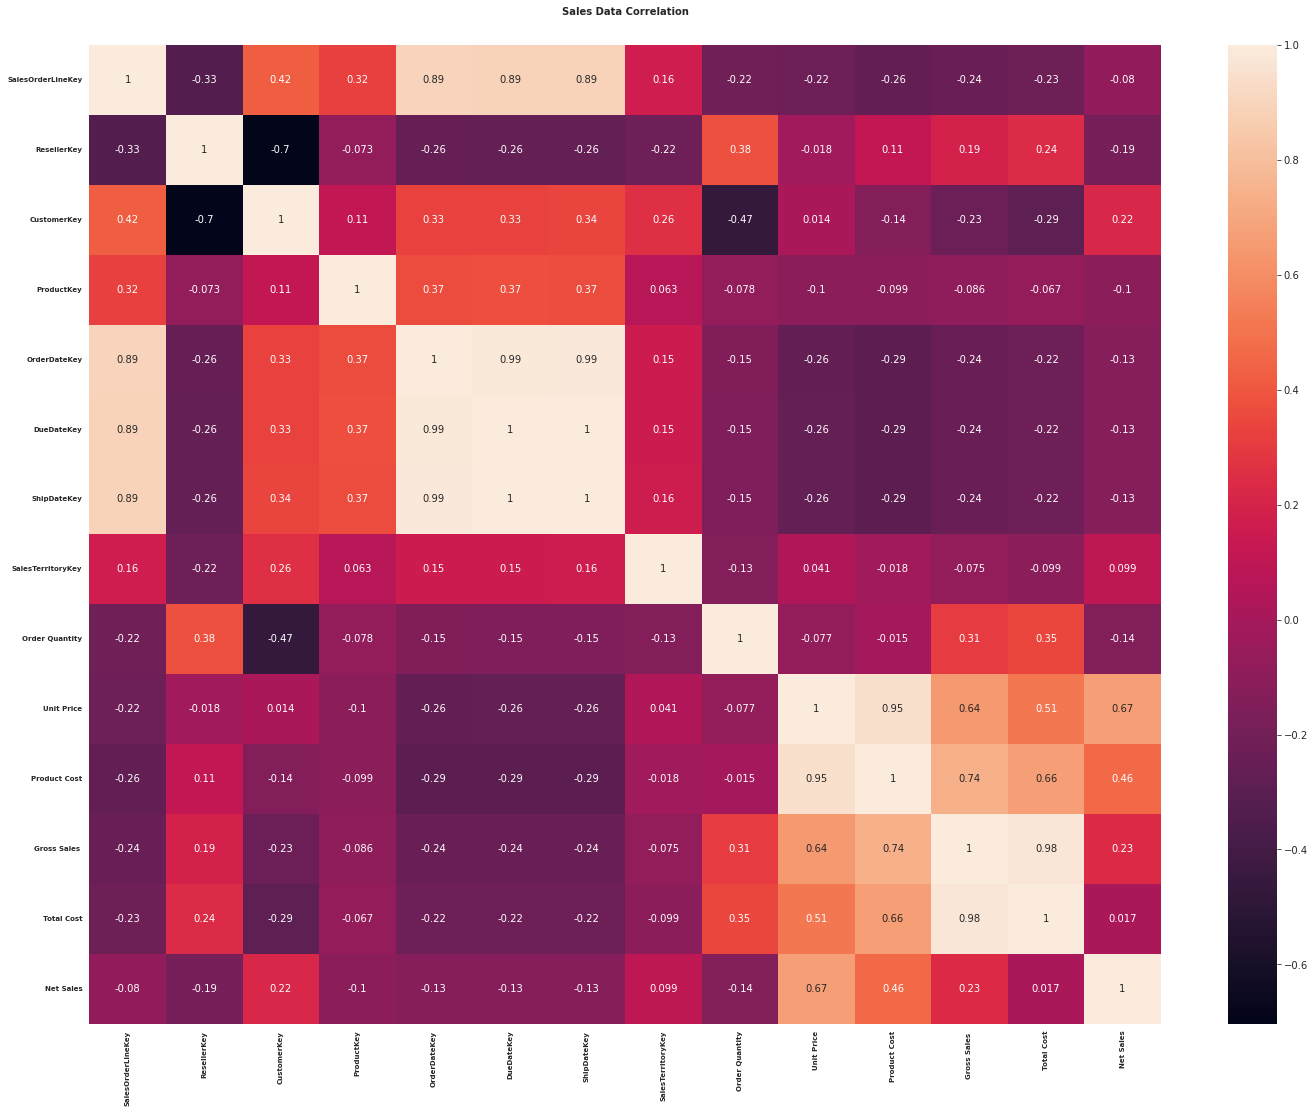

In [52]:
# let's make a correlation matrix for `sales_data`
plt.figure(figsize=(24, 18)) # figure the size
sns.heatmap(df4.corr(), annot=True) # create a heatmap
plt.title("Sales Data Correlation", weight="bold", fontsize=10, pad=30) # title
plt.xticks(weight="bold", fontsize=7) # x-ticks
plt.yticks(weight="bold", fontsize=7); # y-ticks

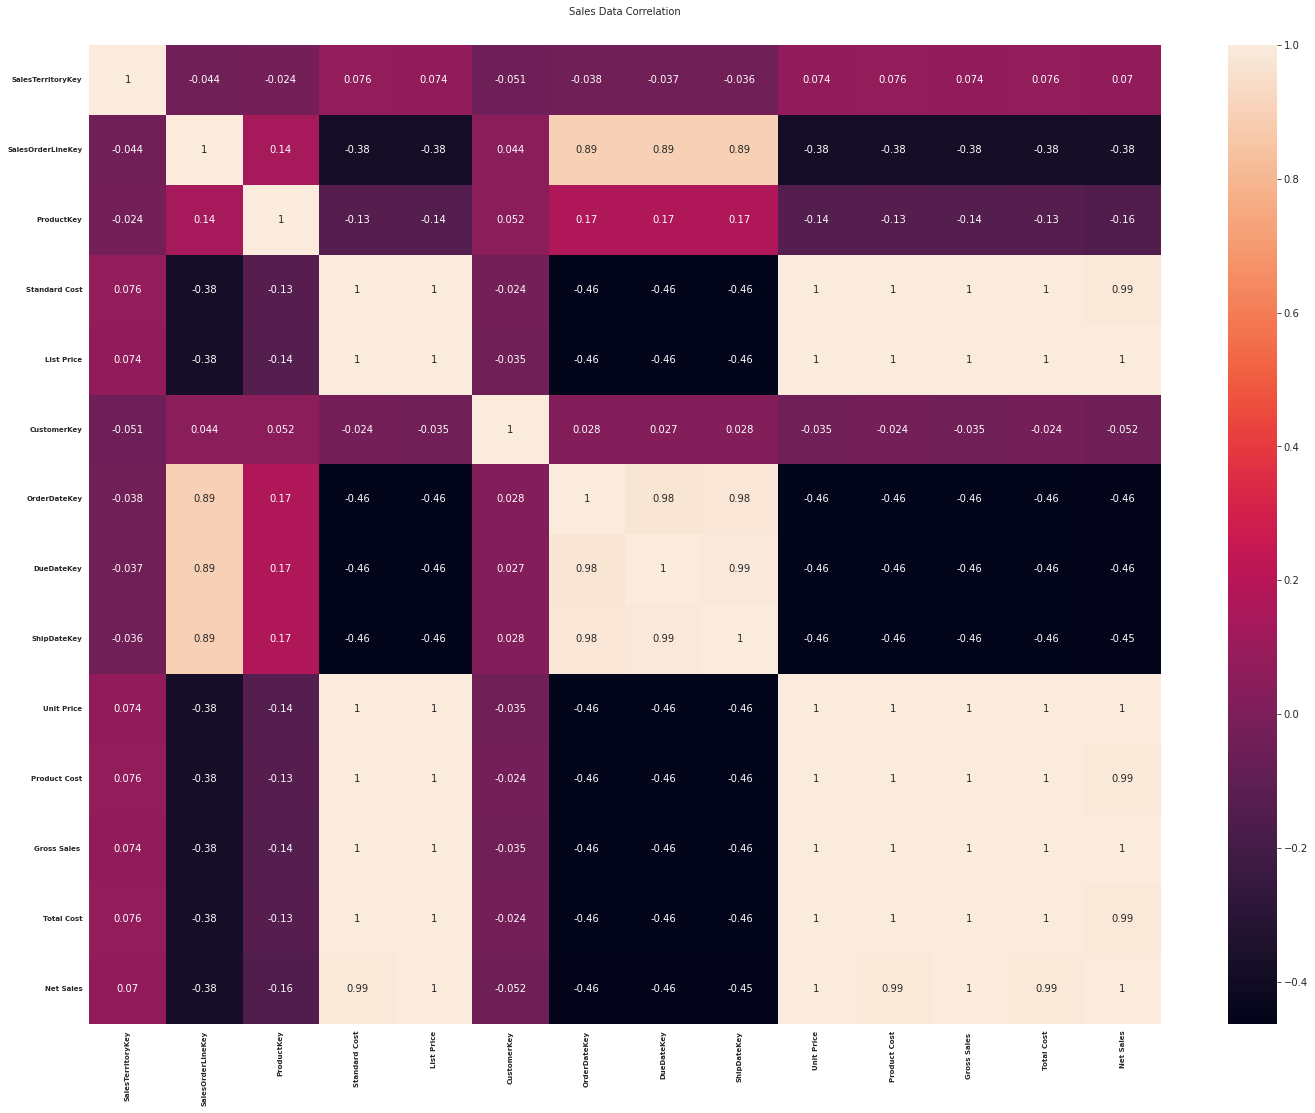

In [53]:
# set the seaborn style
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_style("darkgrid") 

# let's make a correlation matrix for `sales_data`, `product_data`, `
plt.figure(figsize=(24, 18)) # figure the size
# create dataframe which will be used for heatmap plot
corr_dataset = ndf4.drop(['ResellerKey', 'Order Quantity'], axis=1)
sns.heatmap(corr_dataset.corr(), annot=True) # create a heatmap
plt.title("Sales Data Correlation",  fontsize=10, pad=30) # title
plt.xticks(weight="bold", fontsize=7) # x-ticks
plt.yticks(weight="bold", fontsize=7); # y-ticks

In [54]:
# correlation from `sales_data`
(ndf4.corr()['Gross Sales '] # transform it into data corr
           .sort_values(ascending=False) # sort values
           .to_frame() # change it into data frame
           .T)

,List Price,Unit Price,Gross Sales,Standard Cost,Product Cost,Total Cost,Net Sales,SalesTerritoryKey,CustomerKey,ProductKey,SalesOrderLineKey,ShipDateKey,OrderDateKey,DueDateKey,ResellerKey,Order Quantity
Gross Sales,1.0,1.0,1.0,0.997845,0.997845,0.997845,0.995415,0.073906,-0.035415,-0.142207,-0.378956,-0.458601,-0.461202,-0.461477,NaN,NaN


In [55]:
# statistical measure of the dataset
ndf4.describe()

,SalesTerritoryKey,SalesOrderLineKey,ProductKey,Standard Cost,List Price,CustomerKey,ResellerKey,OrderDateKey,DueDateKey,ShipDateKey,Order Quantity,Unit Price,Product Cost,Gross Sales,Total Cost,Net Sales
count,60398.000000,6.039800e+04,60398.000000,60398.000000,60398.000000,60398.000000,60398.0,6.039800e+04,6.039800e+04,5.937800e+04,60398.0,60398.000000,60398.000000,60398.000000,60398.000000,60398.000000
mean,6.244462,6.184938e+07,437.557932,286.065657,486.086911,18841.685420,-1.0,2.019438e+07,2.019465e+07,2.019447e+07,1.0,486.086911,286.065657,486.086911,286.065657,200.021253
std,2.961150,8.030547e+06,118.088390,552.457641,928.489892,5432.430404,0.0,6.435660e+03,6.432749e+03,6.443396e+03,0.0,928.489892,552.457641,928.489892,552.457641,378.959898
min,1.000000,4.369700e+07,214.000000,0.856500,2.290000,11000.000000,-1.0,2.017070e+07,2.017071e+07,2.017071e+07,1.0,2.290000,0.856500,2.290000,0.856500,1.433500
25%,4.000000,5.556000e+07,359.000000,2.973300,7.950000,14003.000000,-1.0,2.019090e+07,2.019091e+07,2.019091e+07,1.0,7.950000,2.973300,7.950000,2.973300,3.123700
50%,7.000000,6.210400e+07,479.000000,11.216300,29.990000,18143.000000,-1.0,2.019122e+07,2.019122e+07,2.019122e+07,1.0,29.990000,11.216300,29.990000,11.216300,15.643700
75%,9.000000,6.865000e+07,529.000000,294.579700,539.990000,23429.750000,-1.0,2.020032e+07,2.020033e+07,2.020032e+07,1.0,539.990000,294.579700,539.990000,294.579700,196.340400
max,10.000000,7.512300e+07,606.000000,2171.294200,3578.270000,29483.000000,-1.0,2.020062e+07,2.020062e+07,2.020062e+07,1.0,3578.270000,2171.294200,3578.270000,2171.294200,1487.835600


In [56]:
# checking skewness value
skew_value = ndf4.skew().sort_values(ascending=False)
skew_value

<ipython-input-56-b80e6fc69dd5>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skew_value = ndf4.skew().sort_values(ascending=False)


Standard Cost        1.950547
Total Cost           1.950547
Product Cost         1.950547
Net Sales            1.936264
Gross Sales          1.927515
List Price           1.927515
Unit Price           1.927515
CustomerKey          0.283653
ResellerKey          0.000000
Order Quantity       0.000000
SalesOrderLineKey   -0.205583
SalesTerritoryKey   -0.485271
ProductKey          -0.798796
yy                  -0.997869
OrderDateKey        -1.105403
ShipDateKey         -1.119776
DueDateKey          -1.150329
dtype: float64

##### `From the above skewness values, we can see that, Product Cost, List Price and Gross Sales are skewed values; since, the skewness value which lies between -0.5 to 0.5  then it is normal.`

In [57]:
def statistical_probability(frequency, total_frequency):
    return frequency / total_frequency

product = ndf4.ProductKey.value_counts().sum()

In [58]:
ndf4.ProductKey

0        346
1        314
2        311
3        332
4        312
        ... 
60393    222
60394    231
60395    530
60396    530
60397    467
Name: ProductKey, Length: 60398, dtype: int64

In [59]:
product_346 = ndf4[ndf4.ProductKey == 346].value_counts().sum()

# Calculating product_346 Probability
product_probability = statistical_probability(product_346, product)
no_product_probability = 1 - product_probability
print('Probability that people will order product key number - 346: %.2f%%' % product_probability)
print('Probability that people will not order product key number - 346: %.2f%%' % no_product_probability)

Probability that people will order product key number - 346: 0.00%
Probability that people will not order product key number - 346: 1.00%


In [60]:
ndf4.columns

Index(['SalesTerritoryKey', 'Region', 'Country', 'Group', 'Channel',
       'SalesOrderLineKey', 'Sales Order', 'Sales Order Line', 'ProductKey',
       'SKU', 'Product', 'Standard Cost', 'Color', 'List Price', 'Model',
       'Subcategory', 'Category', 'CustomerKey', 'Customer ID', 'Customer',
       'City', 'State-Province', 'Country-Region', 'Postal Code',
       'ResellerKey', 'OrderDateKey', 'DueDateKey', 'ShipDateKey',
       'Order Quantity', 'Unit Price', 'Product Cost', 'Gross Sales ',
       'Total Cost', 'Net Sales', 'yy'],
      dtype='object')

## `Region with highest number of sales`

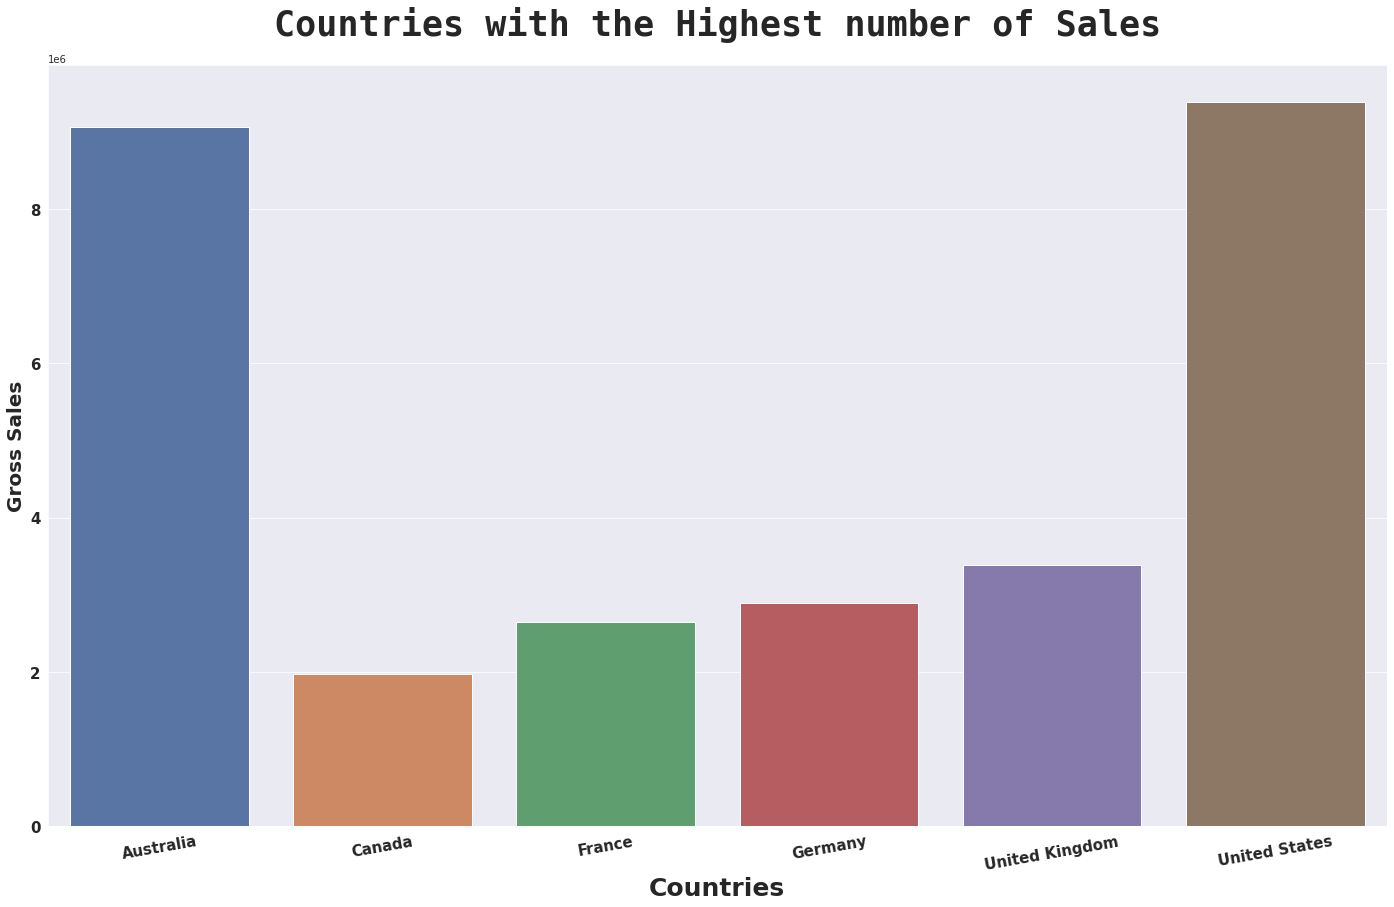

In [61]:
# group of the highest number of sales in city
highest_number_of_sales = ndf4.groupby('Country').sum().astype('int')

# let's plot it
plt.figure(figsize=(24, 14)) # figuring the size

# makes bar plot 
sns.barplot( # barplot
    x=highest_number_of_sales.index, # x-axis
    y=highest_number_of_sales["Gross Sales "], # y-axis
    data=highest_number_of_sales, # data
    palette="deep" # palette
)
plt.title( # title
    "Countries with the Highest number of Sales", 
    fontname="monospace", # font-name
    weight="bold", # weight
    fontsize=35, # font-size
    pad=30 # padding
)
plt.xlabel( # x-label
    "Countries", 
    weight="bold", # weight
    fontsize=25, # font-size
    loc="center" # location
)
plt.xticks( # x-ticks
    weight="bold", # weight
    fontsize=15, # font-size
    rotation=10
)
plt.ylabel( # y-label
    "Gross Sales", 
    weight="bold", # weight
    fontsize=20 # font-size
)
plt.yticks( # y-ticks
    weight="bold", # weight 
    fontsize=15 # font-size
);

In [62]:
df4 = df4[df4.yy != '2']

In [63]:
df4.head()

,SalesOrderLineKey,ResellerKey,CustomerKey,ProductKey,OrderDateKey,DueDateKey,ShipDateKey,SalesTerritoryKey,Order Quantity,Unit Price,Product Cost,Gross Sales,Total Cost,Net Sales,yy
0,43659001,676,-1,349,20170702,20170712,20170709.0,5,1,2024.994,1898.0944,2024.994,1898.0944,126.8996,2017
1,43659002,676,-1,350,20170702,20170712,20170709.0,5,3,2024.994,1898.0944,6074.982,5694.2832,380.6988,2017
2,43659003,676,-1,351,20170702,20170712,20170709.0,5,1,2024.994,1898.0944,2024.994,1898.0944,126.8996,2017
3,43659004,676,-1,344,20170702,20170712,20170709.0,5,1,2039.994,1912.1544,2039.994,1912.1544,127.8396,2017
4,43659005,676,-1,345,20170702,20170712,20170709.0,5,1,2039.994,1912.1544,2039.994,1912.1544,127.8396,2017


In [64]:
from statsmodels.graphics.gofplots import qqplot
def univariate_analysis(data, color, title1):
  plt.figure(figsize=(24, 14))
  plt.title( title1, 
    fontname="monospace", # font-name
    fontsize=35, # font-size
)
  sns.distplot(
      data, # data
      kde=True, # kde
      color=color # color
    )
  plt.show()

<ipython-input-64-5fc859a54f46>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(


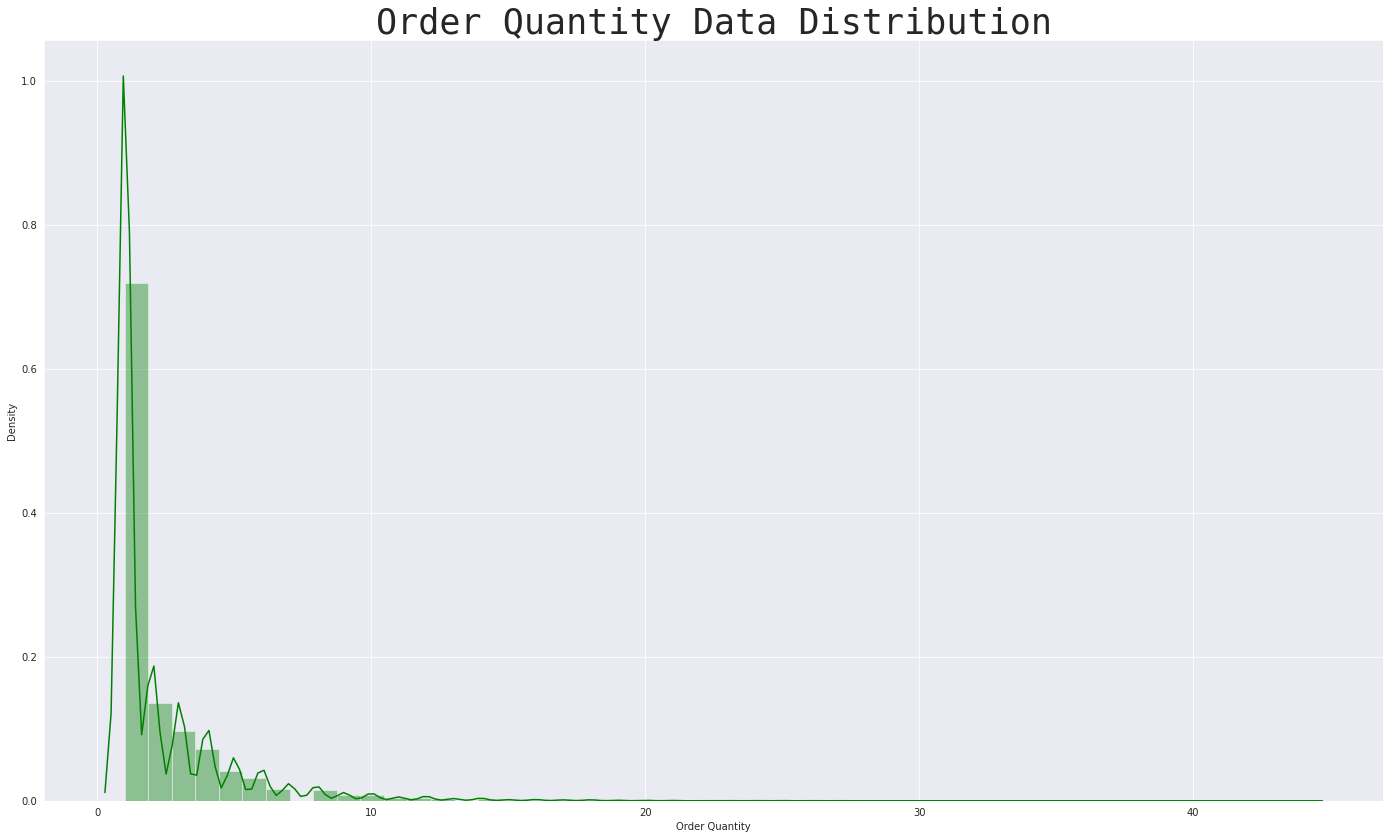

In [65]:
univariate_analysis( 
    data=df4['Order Quantity'], 
    color='green', 
    title1='Order Quantity Data Distribution',
);

In [66]:
df4.columns

Index(['SalesOrderLineKey', 'ResellerKey', 'CustomerKey', 'ProductKey',
       'OrderDateKey', 'DueDateKey', 'ShipDateKey', 'SalesTerritoryKey',
       'Order Quantity', 'Unit Price', 'Product Cost', 'Gross Sales ',
       'Total Cost', 'Net Sales', 'yy'],
      dtype='object')

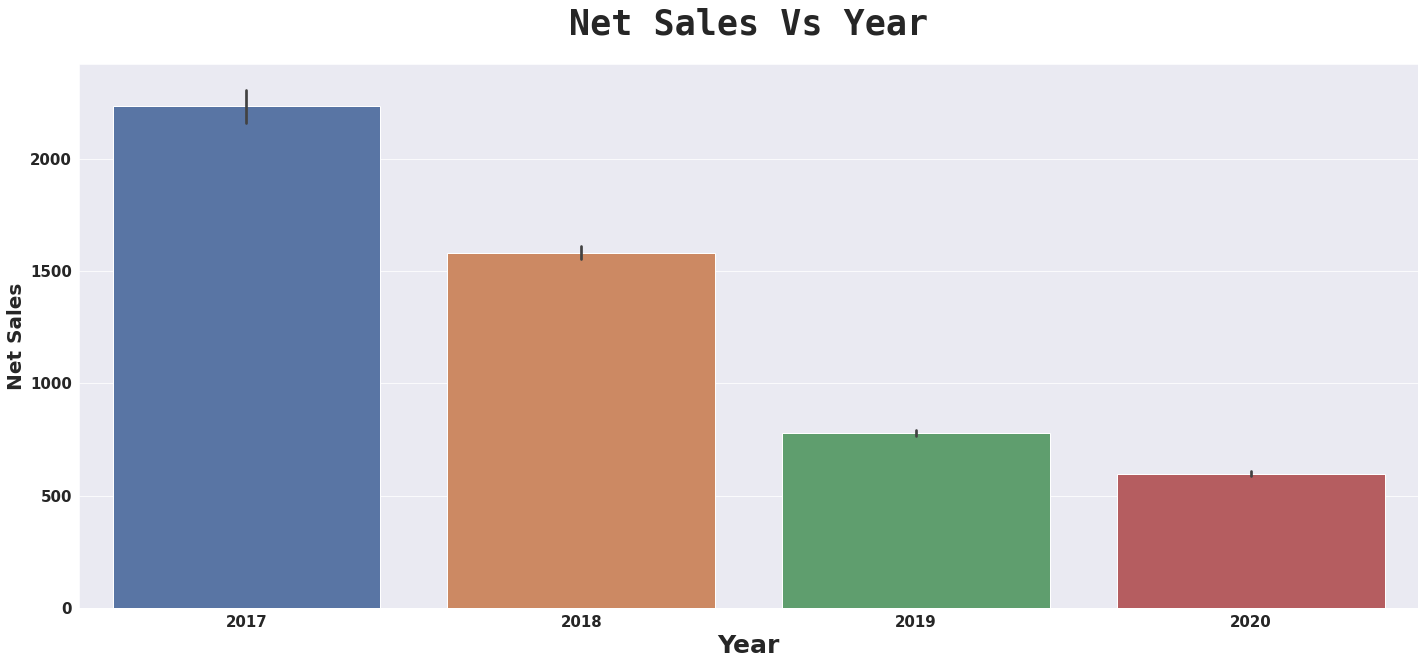

In [67]:
# yearwise net sales

# let's plot it
plt.figure(figsize=(24, 10)) # figuring the size

sns.barplot( # barplot
    x="yy", # x-axis
    y="Gross Sales ", # y-axis
    data=df4, # data
    palette="deep" # palette
)
plt.title( # title
    "Net Sales Vs Year", 
    fontname="monospace", # font-name
    weight="bold", # weiqht
    fontsize=35, # font-size
    pad=30 # padding
)
plt.xlabel( # x-label
    "Year", 
    weight="bold", # weight
    fontsize=25, # font-size
    loc="center" # location
)
plt.xticks( # x-ticks
    weight="bold", # weight
    fontsize=15 # font-size
)
plt.ylabel( # y-label
    "Net Sales", 
    weight="bold", # weight
    fontsize=20 # font-size
)
plt.yticks( # y-ticks
    weight="bold", # weight 
    fontsize=15 # font-size
);

In [68]:
ndf1.head()

,CustomerKey,Customer ID,Customer,City,State-Province,Country-Region,Postal Code,SalesOrderLineKey,ResellerKey,ProductKey,...,DueDateKey,ShipDateKey,SalesTerritoryKey,Order Quantity,Unit Price,Product Cost,Gross Sales,Total Cost,Net Sales,yy
0,11000,AW00011000,Jon Yang,Rockhampton,Queensland,Australia,4700,43793001,-1,344,...,20170722,20170719.0,9,1,3399.99,1912.1544,3399.99,1912.1544,1487.8356,2017
1,11000,AW00011000,Jon Yang,Rockhampton,Queensland,Australia,4700,51522001,-1,353,...,20190701,20190628.0,9,1,2319.99,1265.6195,2319.99,1265.6195,1054.3705,2019
2,11000,AW00011000,Jon Yang,Rockhampton,Queensland,Australia,4700,51522002,-1,485,...,20190701,20190628.0,9,1,21.98,8.2205,21.98,8.2205,13.7595,2019
3,11000,AW00011000,Jon Yang,Rockhampton,Queensland,Australia,4700,57418001,-1,573,...,20191014,20191011.0,9,1,2384.07,1481.9379,2384.07,1481.9379,902.1321,2019
4,11000,AW00011000,Jon Yang,Rockhampton,Queensland,Australia,4700,57418002,-1,541,...,20191014,20191011.0,9,1,28.99,10.8423,28.99,10.8423,18.1477,2019


In [69]:
ndf1.columns

Index(['CustomerKey', 'Customer ID', 'Customer', 'City', 'State-Province',
       'Country-Region', 'Postal Code', 'SalesOrderLineKey', 'ResellerKey',
       'ProductKey', 'OrderDateKey', 'DueDateKey', 'ShipDateKey',
       'SalesTerritoryKey', 'Order Quantity', 'Unit Price', 'Product Cost',
       'Gross Sales ', 'Total Cost', 'Net Sales', 'yy'],
      dtype='object')

In [70]:
ndf1["Net Sales"].min()

1.4335

In [71]:
ndf1["Net Sales"].max()

1487.8355999999999

In [72]:
ndf1.loc[ndf1['Net Sales'] >= 1487]

,CustomerKey,Customer ID,Customer,City,State-Province,Country-Region,Postal Code,SalesOrderLineKey,ResellerKey,ProductKey,...,DueDateKey,ShipDateKey,SalesTerritoryKey,Order Quantity,Unit Price,Product Cost,Gross Sales,Total Cost,Net Sales,yy
0,11000,AW00011000,Jon Yang,Rockhampton,Queensland,Australia,4700,43793001,-1,344,...,20170722,20170719.0,9,1,3399.99,1912.1544,3399.99,1912.1544,1487.8356,2017
19,11002,AW00011002,Ruben Torres,Hobart,Tasmania,Australia,7001,43736001,-1,346,...,20170715,20170712.0,9,1,3399.99,1912.1544,3399.99,1912.1544,1487.8356,2017
23,11003,AW00011003,Christy Zhu,North Ryde,New South Wales,Australia,2113,43701001,-1,346,...,20170711,20170708.0,9,1,3399.99,1912.1544,3399.99,1912.1544,1487.8356,2017
32,11004,AW00011004,Elizabeth Johnson,Wollongong,New South Wales,Australia,2500,43810001,-1,345,...,20170724,20170721.0,9,1,3399.99,1912.1544,3399.99,1912.1544,1487.8356,2017
44,11006,AW00011006,Janet Alvarez,Matraville,New South Wales,Australia,2036,43819001,-1,346,...,20170725,20170722.0,9,1,3399.99,1912.1544,3399.99,1912.1544,1487.8356,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60233,29410,AW00029410,Lucas Price,Hof,Bayern,Germany,95010,44723001,-1,345,...,20171107,20171104.0,8,1,3399.99,1912.1544,3399.99,1912.1544,1487.8356,2017
60321,29448,AW00029448,Lindsey Yuan,Hamburg,Hessen,Germany,22001,44571001,-1,347,...,20171011,20171008.0,8,1,3399.99,1912.1544,3399.99,1912.1544,1487.8356,2017
60322,29449,AW00029449,Laura Chen,Salzgitter,Hessen,Germany,38231,44646001,-1,344,...,20171023,20171020.0,8,1,3399.99,1912.1544,3399.99,1912.1544,1487.8356,2017
60381,29475,AW00029475,Jared Ward,Hamburg,Hamburg,Germany,20354,45024001,-1,344,...,20171209,20171206.0,8,1,3399.99,1912.1544,3399.99,1912.1544,1487.8356,2017


## `Deliverable 2`

In [73]:
# assumption: since we want to predict the sales so, I converted order date key, to the date format which is YYYY-MM-DD and treated sales dataset as time-series dataset for predicting the net sales
order_date_key = ndf1["OrderDateKey"]
order_date_key

0        20170712
1        20190621
2        20190621
3        20191004
4        20191004
           ...   
60393    20191218
60394    20191218
60395    20180113
60396    20190219
60397    20190210
Name: OrderDateKey, Length: 60398, dtype: int64

In [74]:
import datetime

date_obj = []
# create a datetime object from the string
for value in order_date_key:
  obj = datetime.datetime.strptime(str(value), "%Y%m%d")
  formatted_date = obj.strftime("%Y-%m-%d")
  date_obj.append(formatted_date)

In [75]:
date_obj[0]

'2017-07-12'

In [76]:
ndf1["Order Date"] = date_obj

In [77]:
ndf1['Customer ID'] = ndf1['Customer ID'].astype(str)

##### `Conversion of the object datatype to the string for bunch of columns`

In [78]:
ndf1['Customer'] = ndf1['Customer'].astype('str')
ndf1['City'] = ndf1['City'].astype('str')
ndf1['State-Province'] = ndf1['State-Province'].astype('str')
ndf1['Country-Region'] = ndf1['Country-Region'].astype('str')
ndf1["Order Date"] = ndf1["Order Date"].astype('str')

In [79]:
backup_df = ndf1

In [80]:
sales_pie = backup_df.groupby("Country-Region")["Gross Sales "].sum()

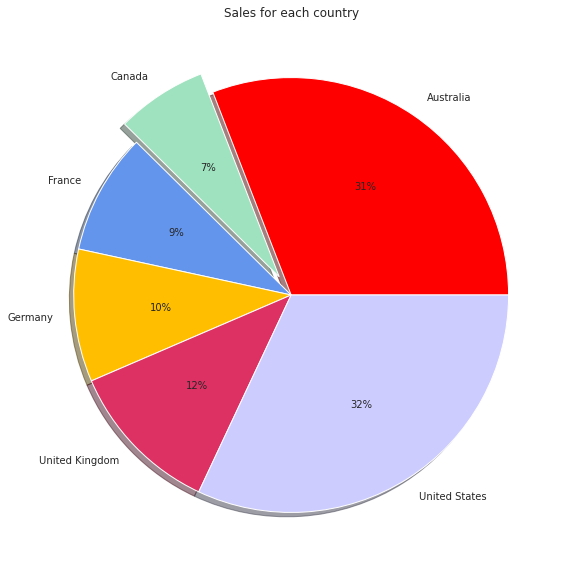

In [81]:
plt.figure(figsize=(14,10))

plt.pie(sales_pie,autopct="%1.0f%%",labels=["Australia","Canada","France","Germany","United Kingdom", "United States"],shadow=True,explode=[0.0,0.1,0.0, 0.0, 0.0, 0.0],colors=['r', '#9FE2BF', '#6495ED', '#FFBF00', '#DE3163', '#CCCCFF'])
plt.title("Sales for each country")
plt.show()

In [82]:
ndf1.head()

,CustomerKey,Customer ID,Customer,City,State-Province,Country-Region,Postal Code,SalesOrderLineKey,ResellerKey,ProductKey,...,ShipDateKey,SalesTerritoryKey,Order Quantity,Unit Price,Product Cost,Gross Sales,Total Cost,Net Sales,yy,Order Date
0,11000,AW00011000,Jon Yang,Rockhampton,Queensland,Australia,4700,43793001,-1,344,...,20170719.0,9,1,3399.99,1912.1544,3399.99,1912.1544,1487.8356,2017,2017-07-12
1,11000,AW00011000,Jon Yang,Rockhampton,Queensland,Australia,4700,51522001,-1,353,...,20190628.0,9,1,2319.99,1265.6195,2319.99,1265.6195,1054.3705,2019,2019-06-21
2,11000,AW00011000,Jon Yang,Rockhampton,Queensland,Australia,4700,51522002,-1,485,...,20190628.0,9,1,21.98,8.2205,21.98,8.2205,13.7595,2019,2019-06-21
3,11000,AW00011000,Jon Yang,Rockhampton,Queensland,Australia,4700,57418001,-1,573,...,20191011.0,9,1,2384.07,1481.9379,2384.07,1481.9379,902.1321,2019,2019-10-04
4,11000,AW00011000,Jon Yang,Rockhampton,Queensland,Australia,4700,57418002,-1,541,...,20191011.0,9,1,28.99,10.8423,28.99,10.8423,18.1477,2019,2019-10-04


#### `Dropping couple of columns which are of no use, to make sales prediction`

In [83]:
ndf1.drop([ 'Customer ID', 'Customer',  'SalesOrderLineKey', 'ResellerKey',
       'ProductKey', 'OrderDateKey', 'DueDateKey', 'ShipDateKey',
       'SalesTerritoryKey'],  axis=1, inplace=True)

In [84]:
# select columns with numerical data types
num_data_ix = ndf1.select_dtypes(include=['int64', 'float64']).columns

In [85]:
num_data_ix

Index(['CustomerKey', 'Order Quantity', 'Unit Price', 'Product Cost',
       'Gross Sales ', 'Total Cost', 'Net Sales'],
      dtype='object')

In [86]:
ndf1.columns

Index(['CustomerKey', 'City', 'State-Province', 'Country-Region',
       'Postal Code', 'Order Quantity', 'Unit Price', 'Product Cost',
       'Gross Sales ', 'Total Cost', 'Net Sales', 'yy', 'Order Date'],
      dtype='object')

In [87]:
ndf1.drop(['yy'],  axis=1, inplace=True)

In [88]:
categorical_vars = ['City', 'State-Province', 'Country-Region']
d = defaultdict(LabelEncoder)

# Encoding the categorical variable
categorical_data = ndf1[categorical_vars].apply(lambda x: d[x.name].fit_transform(x))

#One hot encoding, create dummy variables for every category of every categorical variable
dummy_data_ix = pd.get_dummies(ndf1[categorical_vars])

In [89]:
final_dataset = pd.concat([ndf1[ 'Order Quantity'],ndf1['Product Cost'], ndf1['Gross Sales '], ndf1['Total Cost'], ndf1['Net Sales'], ndf1['CustomerKey'], dummy_data_ix], axis = 1)

In [90]:
final_dataset.shape

(60398, 334)

In [91]:
X = final_dataset.drop('Net Sales', axis=1)
y = final_dataset['Net Sales']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

## `Modelling via Linear Regression `

In [92]:
model = LinearRegression()
model.fit(X_train, y_train)
ypred = model.predict(X_test)

In [ ]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [ ]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

In [ ]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

In [ ]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

In [ ]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  
plt.xlabel('y_train - y_train_pred', fontsize = 15)        
plt.show()

In [ ]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [ ]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
# this r-squared value of 1, indicates our model is performing really very well
r_squared = r2_score(y_test, y_pred)
r_squared